# Zipf

# A1.  Zipf’sches Gesetz - Understanding


Rate the following statement as true or false and briefly justify your decision! 


 1. If you plot the ranks and frequencies of words from a corpus in a coordinate system, you get a straight line according to Zipf's law.

 2. From Zipf's law follows that the number of different word forms (types) in a text is proportional to its length.  

 3.  If one plots the curves to Zipf's law for several corpora of a language in a double logarithmic coordinate system, one obtains approximately parallel curves.

 4. The constant c is different for different languages.


### Solution:

1. Almost : The Zipf law will show a linear relation in the a log-log plot! It's a powerlaw in regular coordinates.
2. Yes it does. Since many words only occurr once in the text it is likely to gain more types the longer the text, $t \sim c N$. But also: Heap's law describes this relation specifically.
3. Yes in loglog world the the constant c corresponts to the intercept of the linear representation
4. Yes, c is language dependent.(Mostly connected to type-token-ratio)

# A2. The long tail of the distribution

From the lecture: It holds $w_n$ - the number of types that occurr $n$ times in a given corpus - fullfills the equation $$ w_n = r_n – r_{n+1} $$
    
 
How many words will likely occur only once in any given text? Deduce a formula.

### Solution

$$ w_n = r_n - r_{n+1} = c \frac{N}{n} - c \frac{N}{n+1} = \frac{cN}{n(n+1)}$$
Now $n=1$ and $cN = |V|$
$$w_1 = \frac{|V|}{2}$$

It is to be expected that half the words in the vocabulary only occur once !

# A3. Application of Zipf's Law
Given the following data from an english corpus with a total number of 71.370 words (tokens):

|  Word  | Frequency | Rank |
|-------|-----------|------|
| he    | 877       | 10   |
| but   | 410       | 20   |
| comes | 16        | 500  |
| applausive | 1    | 8000 |



(a) Estimate Zipf's constant from this data.

(b) From that estimation derive:
    
    - What will be the number of different word forms (types)? 
    - How many of them will appear only once in the text? 
    - Related to the total number of tokens: How high will be the share of word forms that occur only once in the text?
    
 (c) After estimation, assume that `applausive` is the lowest ranked word. Calulate the Zipf constant mathematically by using the Harmonic Series.
 
 (d) What is the difference of the two methods to obtain $c$?


|  Word  | Frequency | rank | f*r|
|-------|-----------|------|------|
| he    | 877       | 10   | 8770 |
| but   | 410       | 20   | 8200 |
| comes | 16        | 500  | 8000 |
| applausive | 1    | 8000 | 8000 |

 a) (8770 + 8200 + 8000 + 8000) / 4 / 71370 = 0.11548970155527533
 b)
   -  ~ 8242 (= $N * c$)
   -  ~ 4121 ( $w_1 = \frac{|V|}{2} = \frac{t}{2}$)
   -  ~ 5.7 % (= $\frac{\frac{t}{2}}{N}$)

 c) harmonic series:
$$ c = \frac{1}{\sum_{i=1}^{8000}{\frac{1}{i}}} $$

 d) 
   - statistical vs arithmetic approximation
   - harmonic series only dependent on vocabulary size


In [1]:
# harmonic series
1/sum([1/i for i in range(1,8000)])

0.104554935949181

# A4. - Further Application of Zipf’s Law
From the lecture:$r(n_w=x)$ gives the largest rank of all word forms that occur $x$ times in the corpus.
The number of types that probably occur exactly $n$ times in a given corpus $w_n$ fulfills the equation $$ w_n = r_n – r_{n+1} $$

a) Deduce a formula to generalize this result to calculate the number of words that probably occur $n$ to $m$ times in a corpus.

Given a text corpus of German with 1 million sentences and 16 015 429 tokens. (Assume c=0.08)

(b) How large is the vocabulary according to Zipf's law?
    
(c) How many words occur 100 times or more in this text according to Zipf's law?

(d) According to Zipf's law, how many words occur exactly 100 times in this text?


### Solution:
a) $$ w_{n, m} = r_n - r_{m+1} | n\leq m $$
   $$= \sum_{n}^{m} r_n - r_{n+1} = (\frac{cN}{n} - \frac{cN}{n+1}) + (\frac{cN}{n+1} - \frac{cN}{n+1+1}) + \dots + (\frac{cN}{m} - \frac{cN}{m+1})$$
   $$=\frac{cN}{n} + (- \frac{cN}{n+1} + \frac{cN}{n+1} + \dots) - \frac{cN}{m+1}$$
   $$=  \frac{cN}{n} - \frac{cN}{m+1} $$
   $$= cN \left(\frac{1}{n}-\frac{1}{m+1}\right) $$
   $$= cN\left(\frac{m-n+1}{n(m+1)}\right)$$
Assume: 
   $$ n = 100; m = 150$$
   $$ 0.08 \cdot 16015429 \left(\frac{150-100+1}{100(150+1)}\right)$$
   $$ = 1281234 \left(\frac{51}{15100}\right)$$
   $$ = 4327 $$

b) $$ |V| = cN = 0.08 \cdot 16015429 = 1281234 $$ 

c) $$ r_n = c \frac{N}{100} = 12812$$

d) $$ r_{100} - r_{101} = \frac{cN}{n(n+1)} = 127 $$


# Programming

We can use some of the corpora to empirically verify the Zipf assumptions. 

Use the complete books corpus as English corpus.

As German Corpus we will upload a corpus of news articles from Tagesschau.

If you are interested in other resources or other languages see [here](https://wortschatz.uni-leipzig.de/en/download/)

In [2]:
import matplotlib.pyplot as plt
import nltk
import pathlib

In [3]:
def load_german_text(path):
    text = []
    for f in pathlib.Path(path).glob("*.txt"):
        with open(f, "r") as openf:
            text += nltk.word_tokenize(openf.read(), language='german')
    return text

In [4]:
%%time
english_text = nltk.corpus.gutenberg.words(nltk.corpus.gutenberg.fileids())
german_text = load_german_text("tagesschau_corpus/")

CPU times: user 32.7 s, sys: 348 ms, total: 33 s
Wall time: 33.1 s


In [5]:
english_freq = nltk.FreqDist(english_text)
print(f"Number of token (English):{sum(english_freq.values())}")

german_freq = nltk.FreqDist(german_text)
print(f"Number of token (German):{sum(german_freq.values())}")

Number of token (English):2621613
Number of token (German):5031721


## P1 - The Zipf Constant

Write two functions that each return the zipf constant.

    a) Try to estimate the Zipf constant by using empirical frequencies and ranks from the data. (Restrict to rank 10 to 10000.
    b) Calculate the Zipf constant by using the Harmonic Series.

What happens?

In [6]:
def estimate_c(freq):
    # Sort the frequencies of the words
    sorted_freqs = sorted(freq.values(), reverse=True)
    # the sum of all frequencies equals the number of tokens in the corpus
    N = sum(sorted_freqs)
    # Multiply every value of freq with its rank divided by the number of tokens
    zipf = [rank*freq / N for rank, freq in enumerate(sorted_freqs, 1)]
    # Use only the ranks 10:10000 for estimation
    r10to10000 = zipf[10:10000]
    # Average 
    c = sum(r10to10000) / len(r10to10000)
    return c

def calculate_c(freq):
    return 1/sum([1/i for i in range(1,len(freq))])

Esimate the Zipf constant for the two corpora:

In [7]:
estimate_c(german_freq),estimate_c(english_freq)

(0.082060132764375, 0.06143058090935221)

Compare to the harmonic approximation of the zipf constant

In [8]:
calculate_c(german_freq),calculate_c(english_freq)

(0.0794215145767777, 0.087566893771156)

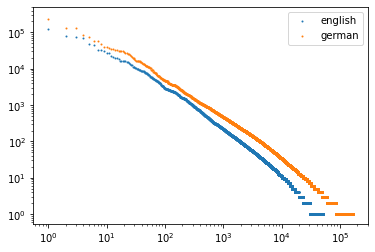

In [9]:
plt.scatter(range(len(english_freq)),sorted(english_freq.values(), reverse=True), label="english", s=1)
plt.scatter(range(len(german_freq)),sorted(german_freq.values(), reverse=True), label="german", s=1)
plt.yscale('log')
plt.xscale('log')
plt.legend()

## P2 - Words Occuring Once

We predict that half of the vocabularies in real corpora only occur once. Write a function that confirms the prediction.

In [10]:
def occur_once(freq):
    w_1 = len([x for x in freq.values() if x == 1])
    return w_1 / len(freq)

In [11]:
occur_once(german_freq), occur_once(english_freq)

(0.4876077129110058, 0.40437094377981075)

# P3  - Text Coverage

The Zipf power law follows similar patterns to the Pareto law (see [here](https://en.wikipedia.org/wiki/Pareto_principle#:~:text=The%20Pareto%20principle%20states%20that,the%20principle%20of%20factor%20sparsity.)).

Not only does a large percentage of words only occur once, also very few words already cover high percentages of any written text.

Calculate the text coverage in dependence of rank.

Plot the results.

What percentage of all words in the vocabulary are needed to cover 80 % of the text corpus ?

In [12]:
def accumulated(freq, t = 0.8):
    # Sort the frequencies in descending order
    sorted_freqs = sorted(freq.values(), reverse=True)
    # the sum of all frequencies equals the number of tokens in the corpus
    N = sum(sorted_freqs)
    # Track the percentage of the corpus that can be explained by the words so far
    # So far: Zero words, so 0 percent of the corpus can be explained.
    # (This does help the iteration to get started)
    p = [0.]
    # Iterate every word in the vocabulary
    for i in range(len(sorted_freqs)):
        # Add the proportion of tokens that are explained by the i'th word 
        # in the vocabulary to the last value in the list
        p.append(p[-1] + sorted_freqs[i]/N)
    # Remove the first value
    p = p[1:]
    # Now scan the list for index at which the threshold is crossed.
    for i in range(len(p)):
        if p[i]>t:
            break
    return p[1:], i

In [13]:
english_acc, english_i = accumulated(english_freq, t=0.8)
german_acc, german_i = accumulated(german_freq, t=0.8)

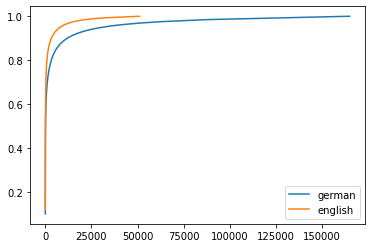

In [14]:
plt.plot(german_acc, label="german")
plt.plot(english_acc, label="english")
plt.legend()

Print the number of words for the german and for the english corpus that make up 80% of the corpus' text:

In [15]:
german_i, english_i

(3264, 876)

In [16]:
german_i / len(german_freq), english_i / len(english_freq)

(0.01977918095769049, 0.01712409101571663)

# P3 - Ngrams


The Zipf law is a special case of a power law. These hold for many other natural occurring things aswell.

Verify a similar relation for character ngrams. 
(Not a mathematical proof. Convince yourself by plotting or looking at the rank/frequency product.)

(Reuse above code if possible!)


In [17]:
def get_ngrams_dist(text, n=3):
    # Get frequency dict for all occurring ngrams
    ngrams = nltk.FreqDist([gram for word in text for gram in nltk.ngrams(word,n)])
    return ngrams

Now we can apply the functions defined above to the frequency dict of ngrams:

In [18]:
english_ngram_freq = get_ngrams_dist(english_text)
print(f"Number of ngrams (English):{sum(english_ngram_freq.values())}")

german_ngram_freq = get_ngrams_dist(german_text)
print(f"Number of ngrams (German):{sum(german_ngram_freq.values())}")

Number of ngrams (English):4743589
Number of ngrams (German):17604522


In [19]:
estimate_c(german_ngram_freq),estimate_c(english_ngram_freq)

(0.07230468413186686, 0.0524681979966785)

In [20]:
calculate_c(german_ngram_freq),calculate_c(english_ngram_freq)

(0.09333327834540893, 0.1015712468267529)

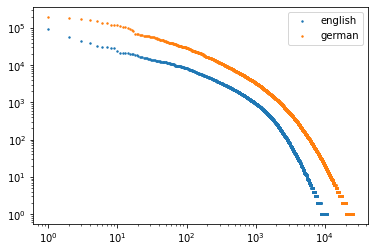

In [21]:
plt.scatter(range(len(english_ngram_freq)),sorted(english_ngram_freq.values(), reverse=True), s=2, label="english")
plt.scatter(range(len(german_ngram_freq)),sorted(german_ngram_freq.values(), reverse=True), s=2, label="german")
plt.xscale("log")
plt.yscale("log")

plt.legend()

## How many ngrams cover 80% of the text ? 

How many of the top frequent ngrams would you need to cover 80% of the text.

How much do these top ngrams overlap for German and English?


In [22]:
german_ngram_acc, german_ngram_i = accumulated(german_ngram_freq, t=0.8)
english_ngram_acc, english_ngram_i = accumulated(english_ngram_freq, t=0.8)

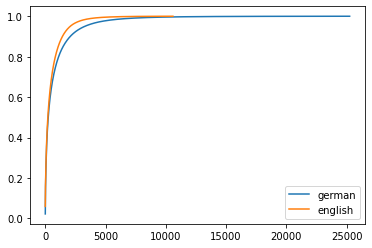

In [23]:
plt.plot(german_ngram_acc, label="german")
plt.plot(english_ngram_acc, label="english")
plt.legend()

In [24]:
german_ngram_i, english_ngram_i

(1107, 834)

So we need around 1000 ngrams to explain the  roughly 80% of the text. Now calculating how many ngrams in these sets overlap between these two languages:

In [45]:
def overlap(f1, f2, k):
    s1 = set([x[0] for x in f1.most_common(k)])
    s2 = set([x[0] for x in f2.most_common(k)])
    l = len(s1 | s2)
    if l == 0:
        return l
    return len(s1.intersection(s2)) / l

overlap(german_ngram_freq, english_ngram_freq, 1000)

0.24533001245330013

## You can use this information in the Application Task in Notebook `Language Detection`. ( You can also go for 90% or 95% text coverage)

While we only need around 1000 ngrams of each language to cover around 80%  of the text, only 25 % of these sets of ngrams overlap. We should be able to use these small sets to detect the language of any text. 
Given that 75 % of these ngrams differ, these sets should be discriminative.
 